In [ ]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

### Given (Training) Data

In [ ]:
# Real given X, y data
y = np.array([6, 0, 0])

X = np.array([[1,0],
     [1,1],
     [1,2]])

### Parameters of Prior, p(w)

In [ ]:
mu_w0 = 0
mu_w1 = 0

variance_w0 = 1
variance_w1 = 3

SIGMA_w = [[variance_w0, 0], [0, variance_w1]]
MEAN_w = [mu_w0, mu_w1]
w_prior = st.multivariate_normal(MEAN_w, SIGMA_w)

In [ ]:
# Defining grid where p(w) is evaluated

_x = np.linspace(-6,8,50)
_y = np.linspace(-6,8,50)
_w0, _w1 = np.meshgrid(_x,_y)

w_grid = np.empty(_w0.shape + (2,))
w_grid[:, :, 0] = _w0; w_grid[:, :, 1] = _w1

In [ ]:
w_grid.shape

(50, 50, 2)

In [ ]:
# p(w) evaluated for different values of w
p_of_w = w_prior.pdf(w_grid)

### Visualizing p(w)

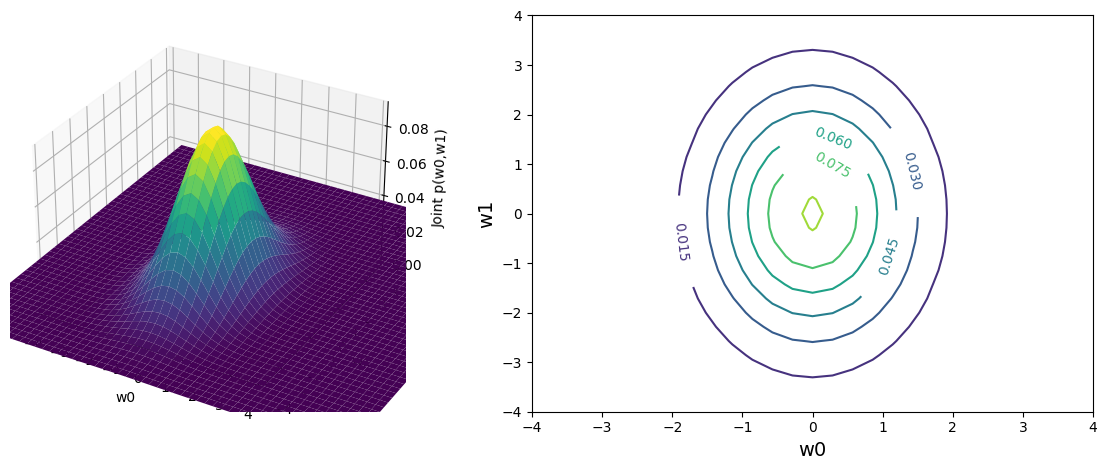

In [ ]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize=plt.figaspect(0.4))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(_w0, _w1, p_of_w,cmap='viridis',linewidth=0)
ax1.set_xlabel('w0')
ax1.set_ylabel('w1')
ax1.set_zlabel('Joint p(w0,w1)')

ax1.set_xlim(-4,4)
ax1.set_ylim(-4,4)


ax2 = fig.add_subplot(1, 2, 2)
cp = ax2.contour(_w0, _w1, p_of_w)
ax2.clabel(cp, inline=True, fontsize=10)
ax2.set_xlabel('w0', fontsize=14)
ax2.set_ylabel('w1', fontsize=14)

ax2.set_xlim(-4,4)
ax2.set_ylim(-4,4)

plt.tight_layout()
plt.show()

### Sampling from p(w)

In [ ]:
w_samples = w_prior.rvs(size=10)
w_samples[:5]

array([[ 0.19992217, -1.44703413],
       [-0.10061356, -0.41454231],
       [-0.03824114, -0.78637969],
       [-0.41777103,  1.34068627],
       [ 1.47056114,  0.38657197]])

### Visualize arbitrary models associated with various samples of p(w)

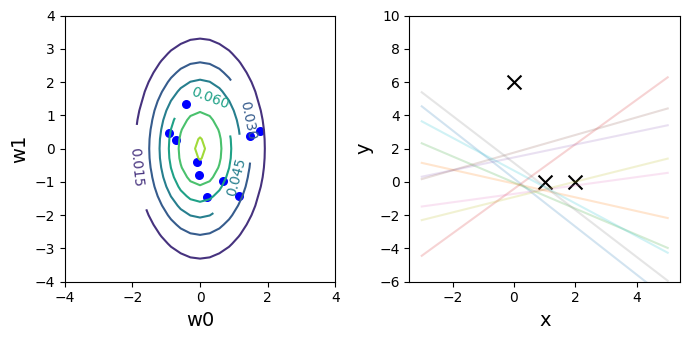

In [ ]:
# X
_xs = np.linspace(-3,5,50)
_x1s = np.ones(len(_xs))
_X = np.column_stack([_x1s,_xs])


nsample = 10
%matplotlib inline
fig, (ax2,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(7,3.5))

for _w in w_samples[:nsample]:
    _y = np.dot(_X, _w)
    ax1.plot(_X[:,1],_y, alpha=0.2)

ax1.scatter(X[:,1], y, marker='x', s=100, c='k')

ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_ylim(-6,10)

cp = ax2.contour(_w0, _w1, p_of_w)
ax2.clabel(cp, inline=True, fontsize=10)
ax2.scatter(w_samples[:,0], w_samples[:,1], c='b', marker='o', s=30)
ax2.set_xlabel('w0', fontsize=14)
ax2.set_ylabel('w1', fontsize=14)

ax2.set_xlim(-4,4)
ax2.set_ylim(-4,4)


plt.tight_layout()

### Evaluate Liklihood, p(y|w) and Posterior, p(w|y)

In [ ]:
def liklihood(y,X,w,sigma_n):
    """
    Evaluate liklihood using Gaussian definition of error function for given value of X, y and w
    """
    y_hat = np.dot(X,w)
    e = y - y_hat
    return np.exp(-1/2 * np.dot(e,e) / (sigma_n ** 2))

In [ ]:
# Evaluating liklihood for the complete w_grid
sigma_n = 1
likelys = np.empty(_w0.shape)
for i in range(_w0.shape[0]):
    for j in range(_w0.shape[1]):
        _w = [_w0[i,j], _w1[i,j]]
        likelys[i,j] = liklihood(y,X,_w,sigma_n)

In [ ]:
# Evaluating posterior for the complete w_grid
posterior = likelys*p_of_w

### Plot Liklihood, Prior and Posterior

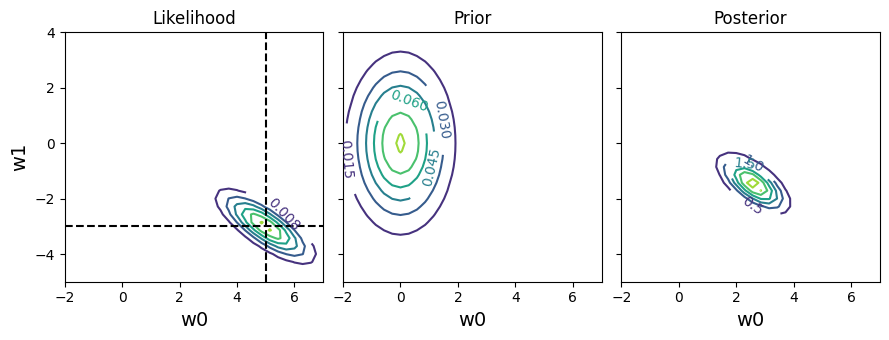

In [ ]:
%matplotlib inline
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(9,3.5), sharex=True, sharey=True)

cp = ax1.contour(_w0, _w1, likelys)
ax1.clabel(cp, inline=True, fontsize=10)
ax1.set_title('Likelihood')

ax1.axvline(x=5, c='k', ls='--')
ax1.axhline(y=-3, c='k', ls='--')

cp = ax2.contour(_w0,_w1, p_of_w)
ax2.clabel(cp, inline=True, fontsize=10)
ax2.set_title('Prior')

cp = ax3.contour(_w0, _w1, likelys*p_of_w)
ax3.clabel(cp, inline=True, fontsize=10)
ax3.set_title('Posterior')

ax1.set_ylabel('w1', fontsize=14)
ax1.set_xlabel('w0', fontsize=14)
ax2.set_xlabel('w0', fontsize=14)
ax3.set_xlabel('w0', fontsize=14)

ax1.set_xlim(-2,7)
ax1.set_ylim(-5,4)

plt.tight_layout()

### Posterior from expression derieved in the class

In [ ]:
A = sigma_n**(-2) * np.dot(X.T,X)  + np.linalg.inv(SIGMA_w)

In [ ]:
w_pos_mean = sigma_n**(-2) * np.dot(np.linalg.inv(A), np.dot(X.T,y))
w_pos_mean

array([ 2.59459459, -1.45945946])

### Question


1. Why posterior mean is different from the solution we obtained in the linear regression (linear algebra based) model, i.e., (5,-3)?

In clasical Linear regression we consider only the Data(likelhood) but when we consider Bayesian linear regression we consider the data as well as the prior which is not considered in the previous case.<BR>
In classical Linear algebra approach we minimize the sum of squared error where error is the difference between the y predicted and y true, while in Bayesian Linear Regression we maximize the posterier distribution obtained.

In [ ]:
w_posterior = st.multivariate_normal(w_pos_mean, np.linalg.inv(A))
w_posterior

In [ ]:
p_of_w_given_y = w_posterior.pdf(w_grid)

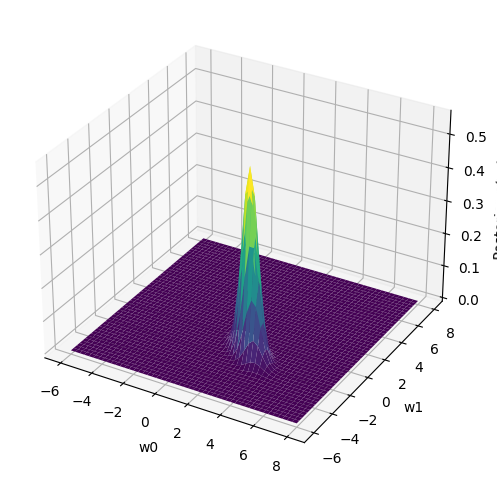

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(6,6))
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')
ax.plot_surface(_w0, _w1, w_posterior.pdf(w_grid),cmap='viridis',linewidth=0)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Posterior p(w | y)')
plt.show()

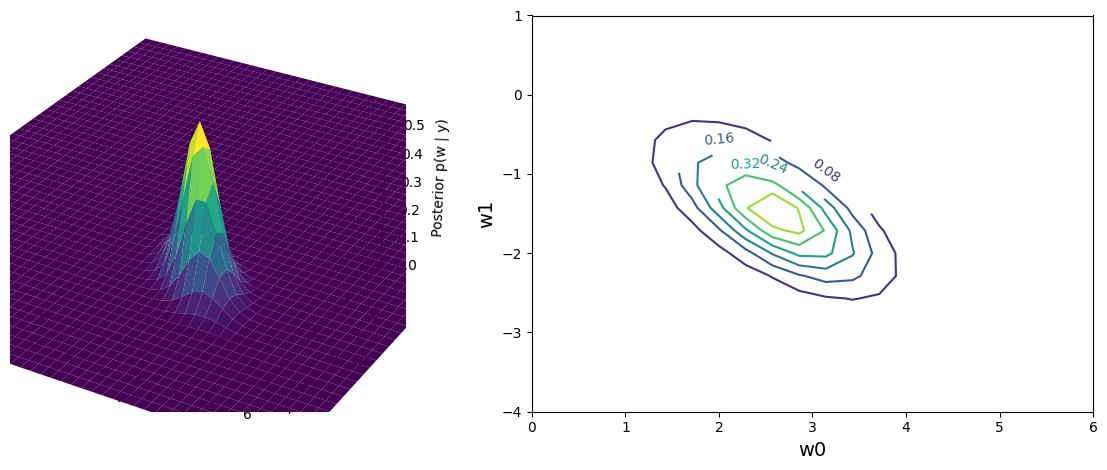

In [ ]:
#%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize=plt.figaspect(0.4))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(_w0, _w1, p_of_w_given_y,cmap='viridis',linewidth=0)
ax1.set_xlabel('w0')
ax1.set_ylabel('w1')
ax1.set_zlabel('Posterior p(w | y)')

ax1.set_xlim(0,6)
ax1.set_ylim(-4,1)


ax2 = fig.add_subplot(1, 2, 2)
cp = ax2.contour(_w0, _w1, p_of_w_given_y)
ax2.clabel(cp, inline=True, fontsize=10)
ax2.set_xlabel('w0', fontsize=14)
ax2.set_ylabel('w1', fontsize=14)

ax2.set_xlim(0,6)
ax2.set_ylim(-4,1)

plt.tight_layout()
plt.show()

### Prediction for test case x*

In [ ]:
x_test = np.array([1,3])

In [ ]:
# Using expressions derieved in class to compute prediction and covariance of the test point
pred_mean = sigma_n**(-2) * np.dot(x_test.T, np.dot(np.linalg.inv(A), np.dot(X.T,y)))
pred_cov = np.dot(x_test.T, np.dot(np.linalg.inv(A), x_test))
pred_mean, pred_cov

(-1.7837837837837842, 1.891891891891892)

### Visualize model prediction at given test point and at any other arbitrary x points

In [ ]:
# Get prediction at x_grid
_pred_means = []
_pred_covs = []
for _x_test in _X:
    _pred_mean = sigma_n**(-2) * np.dot(_x_test.T, np.dot(np.linalg.inv(A), np.dot(X.T,y)))
    _pred_cov = np.dot(_x_test.T, np.dot(np.linalg.inv(A), _x_test))
    _pred_means.append(_pred_mean)
    _pred_covs.append(_pred_cov)

_pred_means = np.array(_pred_means)
_pred_covs = np.array(_pred_covs)

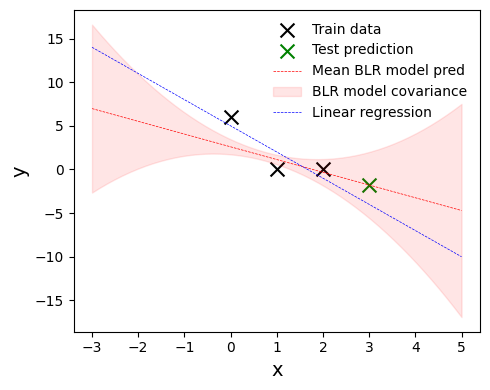

In [ ]:
%matplotlib inline
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5,4))

ax1.scatter(X[:,1], y, marker='x', s=100, c='k', label='Train data')
ax1.scatter(x_test[1], pred_mean, marker='x', s=100, c='g', label='Test prediction')
ax1.plot(_X[:,1],_pred_means, '--r', lw=0.5, label='Mean BLR model pred')
ax1.fill_between(_X[:,1], _pred_means + 2*_pred_covs, _pred_means - 2*_pred_covs, color='r', alpha=0.1, label='BLR model covariance')


# Plot LR result as well

ax1.plot(_X[:,1],np.dot(_X, [5,-3]), '--b', lw=0.5, label='Linear regression')

ax1.legend(frameon=False)

ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)

#ax1.set_xlim(-2,5)

plt.tight_layout()

### Question


2. Why linear regression and Bayesian linear regression model differ for the same training data? <BR>
In Linear regression we mainly focus to calculate the parameter/weights values using MSE in training dataset while in Bayesian Linear Regression we consider the intuition or prior knowlege of the weights during the estimation process.In this the parameters are treated as probabilty distributionsand use bayes theorem to find correct weights that maximizes the posterior distribution.<BR>



3. Under what circumstances will the prediction from the linear regression model become same as that of the mean prediction from the Bayesian linear regression? <BR>
In the case where we set the prior value to be zero means when we claim that we have no prior knowledge of the weights.<BR>
We have a strong dataset in which their is a consistent relationship between the features and the target values.<BR>
There might be a case in which we have high prior knowledge of the weights which are closely related to Linear Regression through domain knowledge expertise in that field.<BR>




4. Why does the Bayesian linear regression model covariance (or the width of the shaded region) is relatively low for x values between (0,2), and high otheriwse (for e.g. when x=-2 or x=-5).<BR>
The width of the shaded region is depends the on the predictive covariance which indicates the uncertainity of the predictions.<BR>
If the training data are concentrated in the region 0-2 the model is confident in its prediction so it would have narrow shaded region.While if x=-2 or x=-5 the model is less certain about the preictions so their would be wider shaded region.<BR>
